In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
import  numpy as np
from PIL import Image

In [3]:
data= pd.read_csv('/Users/rayane/order_lines.csv',header = None)


In [5]:
df=data[4]
type(df)

pandas.core.series.Series

In [6]:
df.head(10)

0         Baskets montantes Run Star Hike-Noir-40 - FR
1                        Baskets basses Falcon-Noir-40
2    Baskets basses V-Lock scratch cuir-Blanc et ro...
3    Blazer Mid '77 Vintage Racer Blue - 39 EU - 6....
4                         W NIKE REACT INFINITY RUN FK
5    React Element 55 White Neon Schematic - 41 EU ...
6                 Redmond - Chaussures de randonnée 39
7                                            FREE TR 7
8                                 AIR ZOOM VOMERO 14 M
9               Baskets basses Hyper Gel Lyte-Blanc-46
Name: 4, dtype: object

In [24]:
listdf=list(df)

In [34]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import *


In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rayane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
all_text = ' '.join([text for text in listdf])
print('Number of words in all_text:', len(all_text))

Number of words in all_text: 286730


In [81]:
stopwords.words('french')
fr_stopwords = stopwords.words('french')
fr_stopwords.append('-')
fr_stopwords.append('FR')
fr_stopwords.append('US')
fr_stopwords.append('EU')
fr_stopwords.append('Pointure')
fr_stopwords.append(':')
fr_stopwords.append('Couleur')
fr_stopwords.append('1')
fr_stopwords.append('2')
fr_stopwords.append('M')
fr_stopwords.append('1/3')
fr_stopwords.append('2/3')



In [82]:
text_tokens = word_tokenize(all_text)
tokens_without_sw = [word for word in text_tokens if not word in fr_stopwords]

textwc = ' '.join([text for text in tokens_without_sw])
print('Number of words in textwc:', len(textwc))
print(textwc)

Number of words in textwc: 255803
Baskets montantes Run Star Hike-Noir-40 Baskets basses Falcon-Noir-40 Baskets basses V-Lock scratch cuir-Blanc rose-38 Blazer Mid '77 Vintage Racer Blue 39 6.5 105€ W NIKE REACT INFINITY RUN FK React Element 55 White Neon Schematic 41 8 145€ Redmond Chaussures randonnée 39 FREE TR 7 AIR ZOOM VOMERO 14 Baskets basses Hyper Gel Lyte-Blanc-46 W NIKE REACT INFINITY RUN FK OX Baskets montantes Run Star Hike-Blanc-41 NIKE Baskets Air Max Command Homme Gris AIR HEIGHTS Baskets basses Prophere-Noir blanc-42 Baskets basses Campus-Noir-46 Baskets basses React Element 55-Multicolore-38 Baskets basses SL 72 bleues-Bleu-44 NEMEZIZ 19.4 IN CAFLAIRE Baskets basses Club C Revenge-Blanc-36 BENASSI JDI Baskets basses Air Force React-Blanc noir-42,5 Baskets basses ML574 ETE-Noir-42,5 Bottines plateformes Jadon-Noir-40 Baskets basses Harrier suède-Bleu marine-43 Sandales cuir craquelé La Poupée-Or-38 Baskets basses Air Tailwind 79-Bordeaux-43 PICO 5 VLC FLYER RUNNER EVOKN

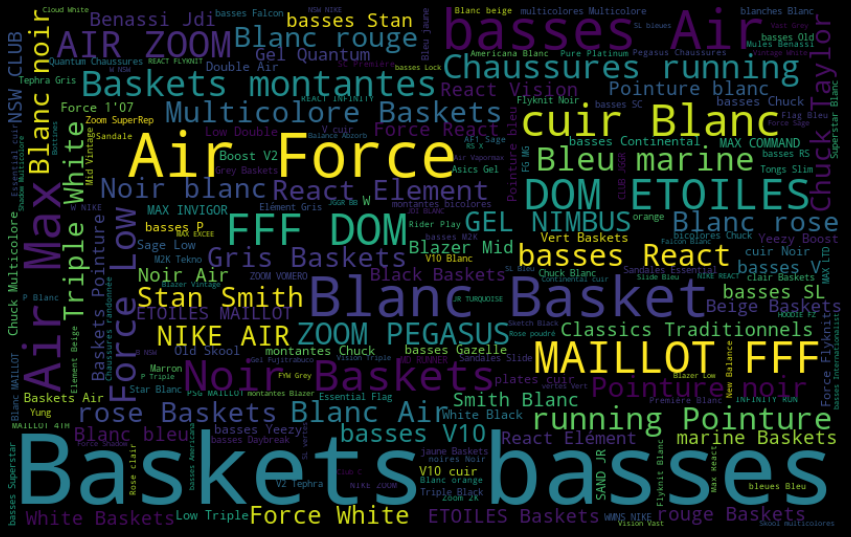

In [83]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(textwc)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

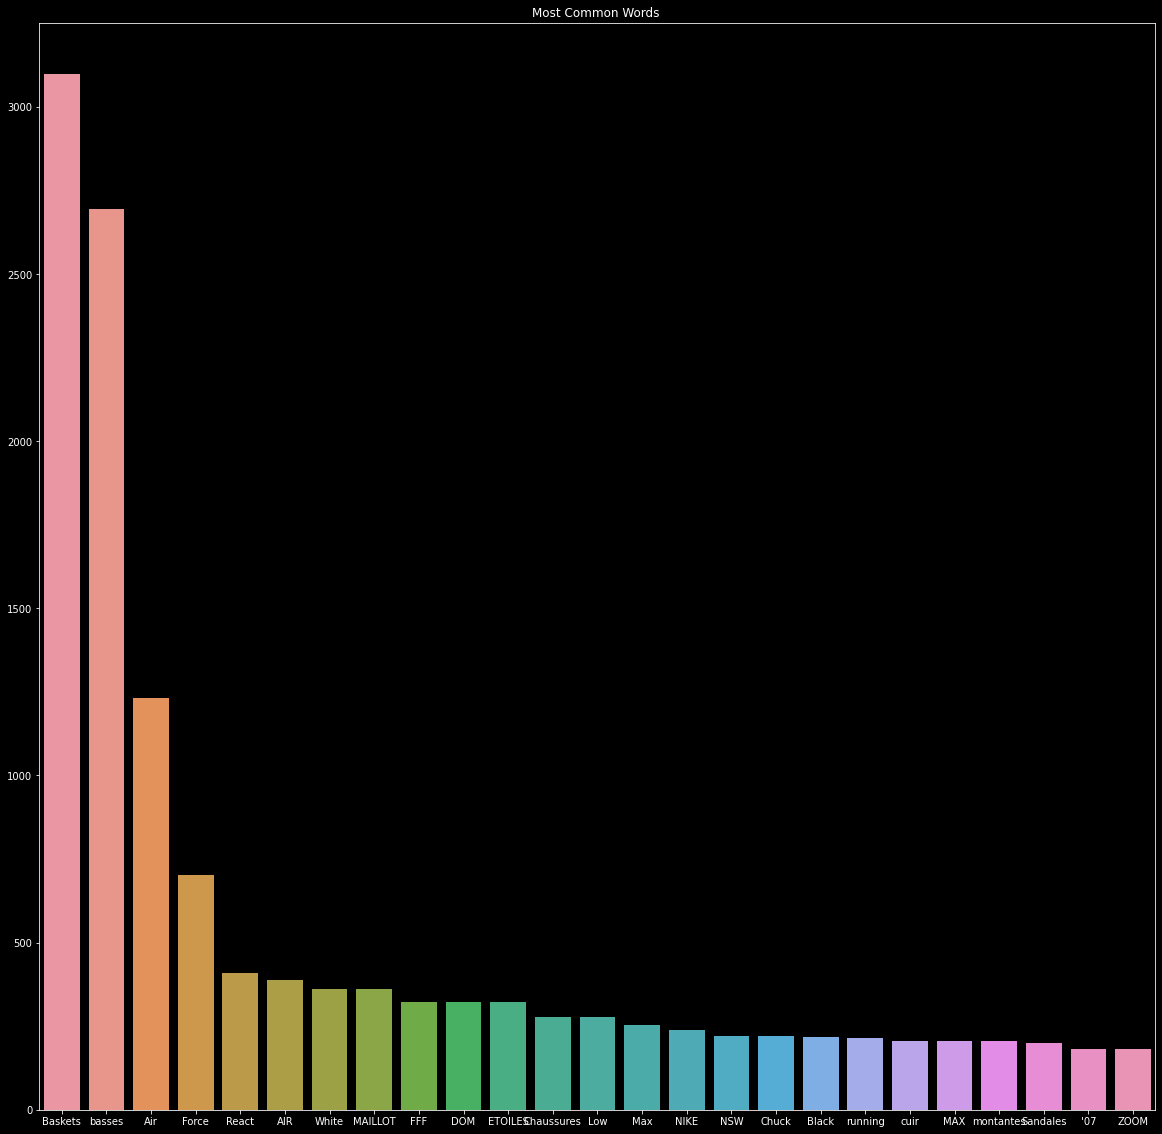

In [85]:
from collections import Counter
import seaborn as sns
listmot = textwc.split()
counts = Counter(listmot)
common_words = [word[0] for word in counts.most_common(25)]
common_counts = [word[1] for word in counts.most_common(25)]

plt.style.use('dark_background')
plt.figure(figsize=(20, 20))

sns.barplot(x=common_words, y=common_counts)
plt.title('Most Common Words ');